<a href="https://colab.research.google.com/github/dhanushnayak/Forecast_using_prophet/blob/main/Phorpet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('/content/AirPassengers.csv')

In [10]:
df.columns = ['ds','y']

df['ds']=pd.to_datetime(df['ds'])

In [12]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [13]:
from prophet import Prophet

In [16]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8o4u794z/ymsk97y5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8o4u794z/kksq0o0q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22607', 'data', 'file=/tmp/tmp8o4u794z/ymsk97y5.json', 'init=/tmp/tmp8o4u794z/kksq0o0q.json', 'output', 'file=/tmp/tmp8o4u794z/prophet_modelb92_zdwh/prophet_model-20230518053314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
pred_date = df.tail(60)['ds']


In [26]:
pred_df = model.predict(pd.DataFrame(pred_date))

In [33]:
pred_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1956-01-01,303.436837,248.216504,305.844071,303.436837,303.436837,-24.599347,-24.599347,-24.599347,-24.599347,-24.599347,-24.599347,0.0,0.0,0.0,278.837490
1,1956-02-01,306.562676,243.674779,302.031941,306.562676,306.562676,-34.760201,-34.760201,-34.760201,-34.760201,-34.760201,-34.760201,0.0,0.0,0.0,271.802475
2,1956-03-01,309.486847,279.188257,336.181129,309.486847,309.486847,-2.085593,-2.085593,-2.085593,-2.085593,-2.085593,-2.085593,0.0,0.0,0.0,307.401254
3,1956-04-01,312.612686,279.522734,336.020721,312.612686,312.612686,-3.975125,-3.975125,-3.975125,-3.975125,-3.975125,-3.975125,0.0,0.0,0.0,308.637561
4,1956-05-01,315.637691,282.696620,339.813819,315.637691,315.637691,-4.427696,-4.427696,-4.427696,-4.427696,-4.427696,-4.427696,0.0,0.0,0.0,311.209994


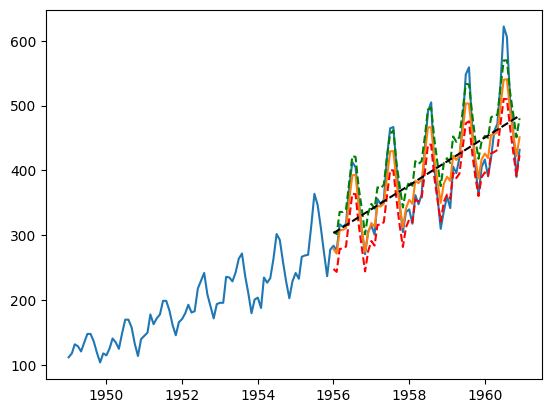

In [36]:

plt.plot(df.set_index('ds'))
plt.plot(pred_df.loc[:,['ds','yhat']].set_index('ds'))
plt.plot(pred_df.loc[:,['ds','yhat_lower']].set_index('ds'),ls='--',c='r')
plt.plot(pred_df.loc[:,['ds','yhat_upper']].set_index('ds'),ls='--',c='g')
plt.plot(pred_df.loc[:,['ds','trend']].set_index('ds'),ls='--',c='k')

Need dataframe in form of time as ds columns and values as y columns